# Dibersity

Plot data saved to: /home/mzubillaga/DocIE/irudiak/bootstrap_scaling_combined_data.csv


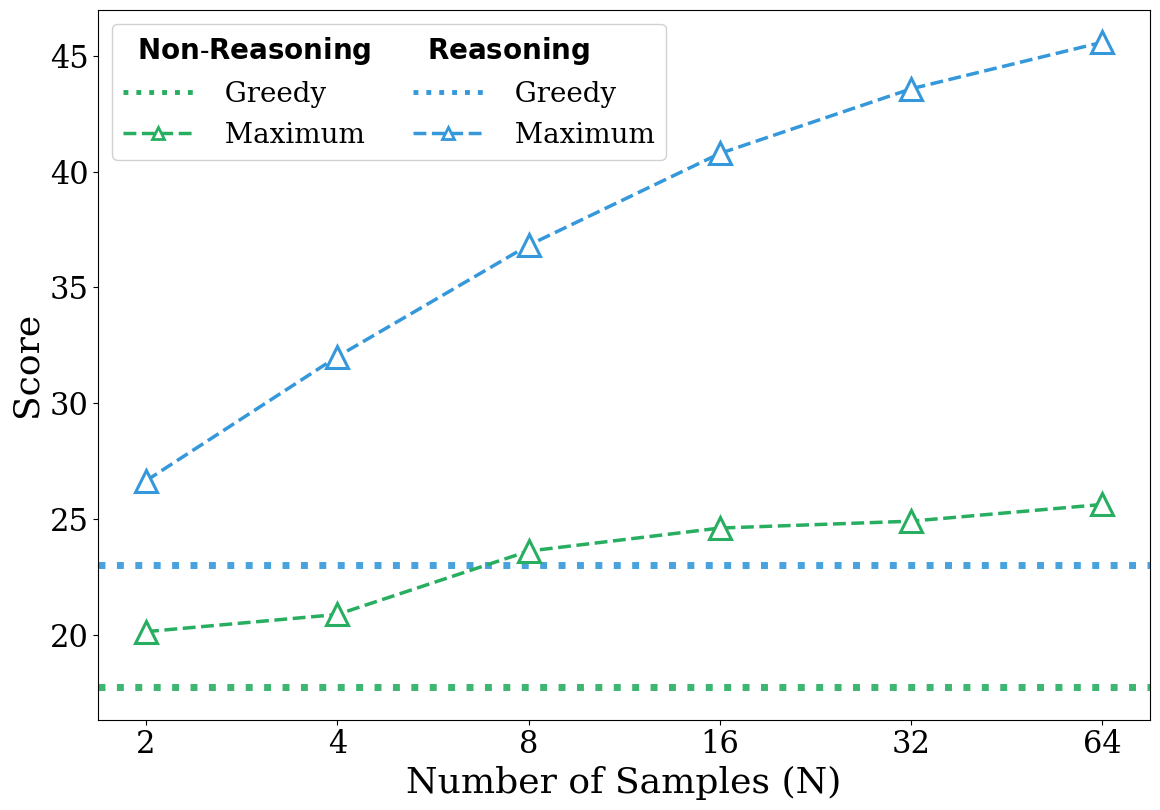

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.text import Text # Import the Text artist class

# Ajustes globales de fuente para paper (más grandes)
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "Nimbus Roman No9 L", "DejaVu Serif"],
    "font.size": 20,
    "axes.titlesize": 25,
    "axes.labelsize": 24,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "figure.titlesize": 25
})
# -----------------------------
# Celda 1: Diversity (bootstrap scaling)
# -----------------------------
df = pd.read_csv('/home/mzubillaga/DocIE/results/MUC/zeroshot/test/boostrap_en_analysis.csv')

models = df['modelname'].unique()

colors = {
    'Qwen3-32B_think': '#3498db',
    'Qwen3-32B_nothink': '#27ae60'
}

model_labels = {
    'Qwen3-32B_think': 'Reasoning',
    'Qwen3-32B_nothink': 'Non-Reasoning'
}

fig, ax = plt.subplots(figsize=(12, 8.5))

# Collect data for CSV
plot_data_rows = []

for model in models:
    df_model = df[df['modelname'] == model].sort_values('size')

    sizes = df_model['size'].values
    mean_values = df_model['random_mean_score'].values
    std_values = df_model['random_std_score'].values
    max_values = df_model['max_score'].values
    voter_f1_values = df_model['voter_f1'].values
    greedy_value = df_model['greedy'].values[0]

    color = colors.get(model, '#333333')
    label = model_labels.get(model, model)

    # Collect data for CSV
    for j, size in enumerate(sizes):
        plot_data_rows.append({
            'model': model,
            'model_label': label,
            'size': size,
            'random_mean_score': mean_values[j],
            'random_std_score': std_values[j],
            'max_score': max_values[j],
            'voter_f1': voter_f1_values[j],
            'greedy': greedy_value
        })

    # Maximum F1
    ax.plot(sizes, max_values, marker='^', linestyle='--', color=color,
            linewidth=2.5, markersize=16, markerfacecolor='white', markeredgewidth=2.2)

    # Voter F1
    #ax.plot(sizes, voter_f1_values, marker='s', linestyle='-.', color=color,
    #        linewidth=2.5, markersize=16)

    # Greedy (línea horizontal)
    ax.axhline(y=greedy_value, color=color, linestyle=':', linewidth=5, alpha=0.9)

# Save plot data to CSV
plot_data_df = pd.DataFrame(plot_data_rows)
plot_data_df.to_csv('/home/mzubillaga/DocIE/irudiak/bootstrap_scaling_combined_data.csv', index=False)
print(f"Plot data saved to: /home/mzubillaga/DocIE/irudiak/bootstrap_scaling_combined_data.csv")

ax.set_xlabel('Number of Samples (N)', fontsize=26)
ax.set_ylabel('Score', fontsize=26)
ax.set_xscale('log', base=2)
unique_sizes = np.unique(df['size'].values)
ax.set_xticks(unique_sizes)
#ax.set_ylim(bottom=0)
ax.set_xticklabels(unique_sizes, fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=22)

# Leyenda personalizada en dos columnas
legend_elements = [
    # Columna 2: Non-Reasoning
    #Text(0, 0,r'$\bf{Non}$-$\bf{Reasoning}$'),
    Line2D([0], [0], color='white', marker='', linestyle='', label=r'$\bf{Non}$-$\bf{Reasoning}$', markersize=0),
    Line2D([0], [0], color='#27ae60', linestyle=':', linewidth=3.5, label='  Greedy'),
    Line2D([0], [0], color='#27ae60', marker='^', linestyle='--', linewidth=2.5, markersize=8, 
           markerfacecolor='white', markeredgewidth=2, label='  Maximum'),
    # Columna 1: Reasoning
    Line2D([0], [0], color='white', marker='', linestyle='', label=r'$\bf{Reasoning}$', markersize=0),
    Line2D([0], [0], color='#3498db', linestyle=':', linewidth=3.5, label='  Greedy'),
    Line2D([0], [0], color='#3498db', marker='^', linestyle='--', linewidth=2.5, markersize=8, 
           markerfacecolor='white', markeredgewidth=2, label='  Maximum'),
]

# Colocar la leyenda arriba, fuera del gráfico, en 2 columnas centradas
#ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 1.02),
#          fontsize=22, ncol=2, columnspacing=1.5, handletextpad=0.5, framealpha=0.9, handlelength=2.5)
ax.legend(handles=legend_elements, loc='upper left',
          fontsize=20, ncol=2, columnspacing=1.5, handletextpad=0.5, framealpha=0.9, handlelength=2.5)



leg = ax.get_legend()

for vpack in leg._legend_handle_box.get_children():
    for hpack in vpack.get_children()[:1]:
        hpack.get_children()[0].set_width(0)

# Dejar espacio encima para la leyenda
#fig.subplots_adjust(top=0.82)


plt.tight_layout()
plt.savefig('/home/mzubillaga/DocIE/irudiak/bootstrap_scaling_combined.pdf', bbox_inches='tight', dpi=300)
plt.savefig('/home/mzubillaga/DocIE/irudiak/bootstrap_scaling_combined.png', bbox_inches='tight', dpi=300)
plt.show()

# Think or Not to Think

Mean Scores plot data saved to: /home/mzubillaga/DocIE/irudiak/random_mean_scores_plot_data.csv


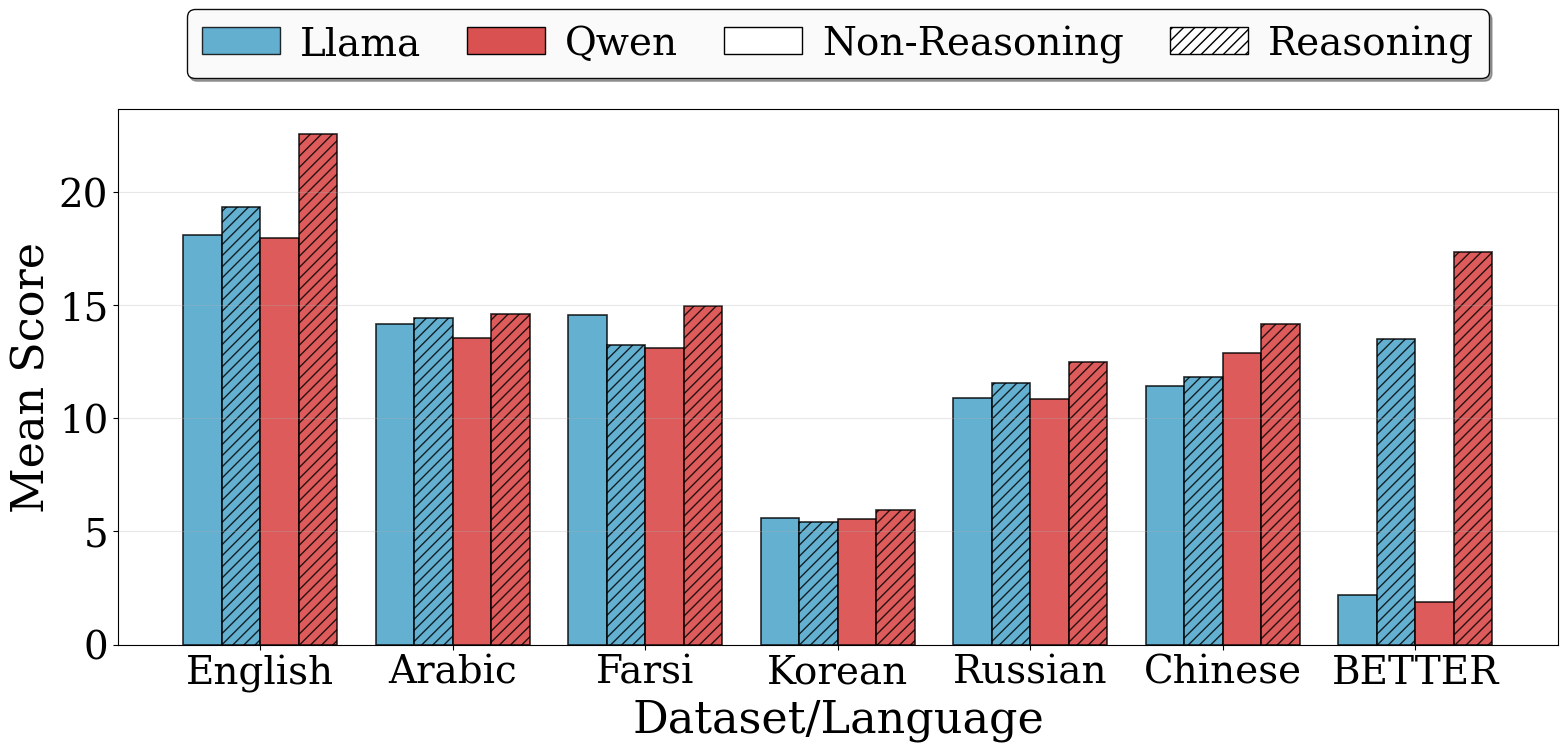

Greedy Scores plot data saved to: /home/mzubillaga/DocIE/irudiak/greedy_scores_plot_data.csv


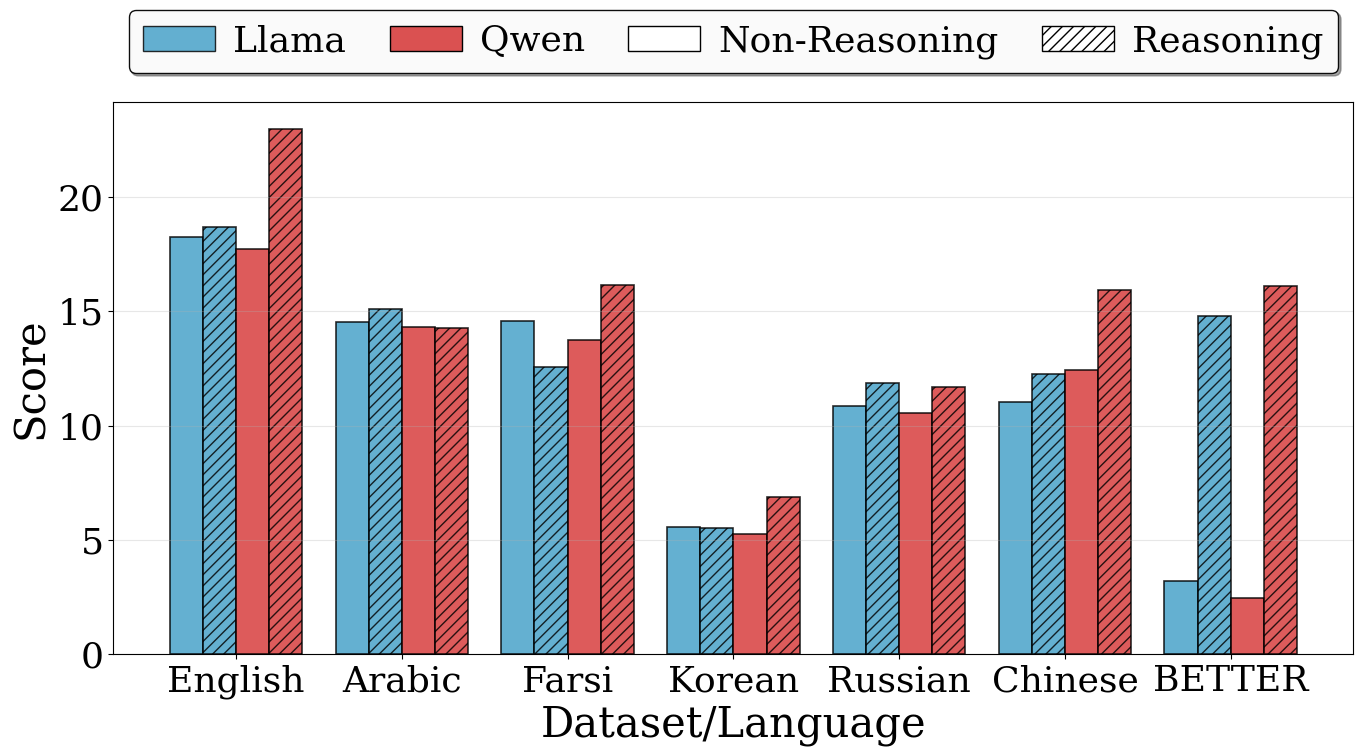

In [14]:
# Cargar datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "Nimbus Roman No9 L", "DejaVu Serif"],
    "font.size": 20,
    "axes.titlesize": 25,
    "axes.labelsize": 24,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "figure.titlesize": 25
})

df2 = pd.read_csv('/home/mzubillaga/DocIE/results/analysis_combined.csv')

# Filtrar solo los 4 modelos de interés
models_of_interest = ['LlamaR1-70B', 'Llama3.3-70B', 'Qwen3-32B_think', 'Qwen3-32B_nothink']
df_filtered = df2[df2['modelname'].isin(models_of_interest)]

#Reorder to put English first and BETTER last
preferred_order = ['en', 'ar', 'fa', 'ko', 'ru', 'zh', 'BETTER']
languages = [lang for lang in preferred_order]
languages_map = {"ar": "Arabic", "en": "English", "fa": "Farsi", "ko": "Korean", "ru": "Russian", "zh": "Chinese", "BETTER": "BETTER"}
languages_mapped = [languages_map.get(lang, lang) for lang in languages]

# Definir colores y patrones
colors = {
    'Llama3.3-70B': "#429FC7E1",
    'LlamaR1-70B': "#429FC7E1",
    'Qwen3-32B_nothink': "#d63737dd",
    'Qwen3-32B_think': "#d63737dd"
}

hatches = {
    'Llama3.3-70B': '',
    'LlamaR1-70B': '///',
    'Qwen3-32B_nothink': '',
    'Qwen3-32B_think': '///'
}

model_labels = {
    'Llama3.3-70B': 'Llama3.3-70B (NR)',
    'LlamaR1-70B': 'LlamaR1-70B (R)',
    'Qwen3-32B_nothink': 'Qwen3-32B (NR)',
    'Qwen3-32B_think': 'Qwen3-32B (R)'
}

model_order = ['Llama3.3-70B', 'LlamaR1-70B', 'Qwen3-32B_nothink', 'Qwen3-32B_think']

x = np.arange(len(languages))
width = 0.2  # Ancho de cada barra

# Leyenda común
legend_elements = [
    Patch(facecolor="#429FC7E1", edgecolor='black', label='Llama', alpha=0.82),
    Patch(facecolor="#d63737dd", edgecolor='black', label='Qwen'),
    Patch(facecolor='white', edgecolor='black', label='Non-Reasoning'),
    Patch(facecolor='white', edgecolor='black', hatch='///', label='Reasoning')
]

# Plot 1: Mean Scores
fig1, ax1 = plt.subplots(figsize=(16, 8))

# Collect data for CSV (Mean Scores)
mean_scores_data = []

for i, model in enumerate(model_order):
    model_data = df_filtered[df_filtered['modelname'] == model]
    scores = [model_data[model_data['Dataset/Language'] == lang]['random_mean_score'].values[0]
              if len(model_data[model_data['Dataset/Language'] == lang]) > 0 else 0
              for lang in languages]
    bars = ax1.bar(x + i * width, scores, width,
                   color=colors[model], edgecolor='black', linewidth=1.2,
                   label=model_labels[model], hatch=hatches[model], alpha=0.82)
    
    # Collect data for CSV
    for j, lang in enumerate(languages):
        mean_scores_data.append({
            'model': model,
            'model_label': model_labels[model],
            'language': lang,
            'language_label': languages_mapped[j],
            'random_mean_score': scores[j]
        })

# Save Mean Scores data to CSV
mean_scores_df = pd.DataFrame(mean_scores_data)
mean_scores_df.to_csv('/home/mzubillaga/DocIE/irudiak/random_mean_scores_plot_data.csv', index=False)
print(f"Mean Scores plot data saved to: /home/mzubillaga/DocIE/irudiak/random_mean_scores_plot_data.csv")

ax1.set_xlabel('Dataset/Language', fontsize=32)
ax1.set_ylabel('Mean Score', fontsize=32)
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(languages_mapped, fontsize=28)
ax1.tick_params(axis='both', which='major', labelsize=28)
ax1.grid(axis='y', alpha=0.3)
#ax1.legend(handles=legend_elements, loc='upper right', fontsize=20, ncol=4)
# Leyenda fuera del gráfico, centrada arriba
ax1.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 1.02), 
          fontsize=28, ncol=4, frameon=True, framealpha=0.95,
          edgecolor='black', fancybox=True, shadow=True,
          columnspacing=1.2, handletextpad=0.5)

# Ajustar espacio para la leyenda
fig1.subplots_adjust(top=0.82, bottom=0.15, left=0.08, right=0.98)


plt.savefig('/home/mzubillaga/DocIE/irudiak/random_mean_scores_plot.pdf', bbox_inches='tight', dpi=300)
plt.savefig('/home/mzubillaga/DocIE/irudiak/random_mean_scores_plot.png', bbox_inches='tight', dpi=300)
plt.show()

# Plot 2: Greedy Scores
fig2, ax2 = plt.subplots(figsize=(16, 8))

# Collect data for CSV (Greedy Scores)
greedy_scores_data = []

for i, model in enumerate(model_order):
    model_data = df_filtered[df_filtered['modelname'] == model]
    scores = [model_data[model_data['Dataset/Language'] == lang]['greedy'].values[0]
              if len(model_data[model_data['Dataset/Language'] == lang]) > 0 else 0
              for lang in languages]
    bars = ax2.bar(x + i * width, scores, width,
                   color=colors[model], edgecolor='black', linewidth=1.2,
                   label=model_labels[model], hatch=hatches[model], alpha=0.82)
    
    # Collect data for CSV
    for j, lang in enumerate(languages):
        greedy_scores_data.append({
            'model': model,
            'model_label': model_labels[model],
            'language': lang,
            'language_label': languages_mapped[j],
            'greedy_score': scores[j]
        })

# Save Greedy Scores data to CSV
greedy_scores_df = pd.DataFrame(greedy_scores_data)
greedy_scores_df.to_csv('/home/mzubillaga/DocIE/irudiak/greedy_scores_plot_data.csv', index=False)
print(f"Greedy Scores plot data saved to: /home/mzubillaga/DocIE/irudiak/greedy_scores_plot_data.csv")

ax2.set_xlabel('Dataset/Language', fontsize=30)
ax2.set_ylabel('Score', fontsize=30)
ax2.set_xticks(x + width * 1.5)
ax2.set_xticklabels(languages_mapped, fontsize=26)
ax2.tick_params(axis='both', which='major', labelsize=26)
ax2.grid(axis='y', alpha=0.3)
# Leyenda fuera del gráfico, centrada arriba
ax2.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 1.02), 
          fontsize=26, ncol=4, frameon=True, framealpha=0.95,
          edgecolor='black', fancybox=True, shadow=True,
          columnspacing=1.2, handletextpad=0.5)

fig2.subplots_adjust(top=0.80)
#ax2.legend(handles=legend_elements, loc='upper right', fontsize=18)

plt.savefig('/home/mzubillaga/DocIE/irudiak/greedy_scores_plot.pdf', bbox_inches='tight', dpi=300)
plt.savefig('/home/mzubillaga/DocIE/irudiak/greedy_scores_plot.png', bbox_inches='tight', dpi=300)
plt.show()

# Selection Strategies 

MUC Reasoning comparison data saved to: /home/mzubillaga/DocIE/irudiak/muc_reasoning_comparison_data.csv


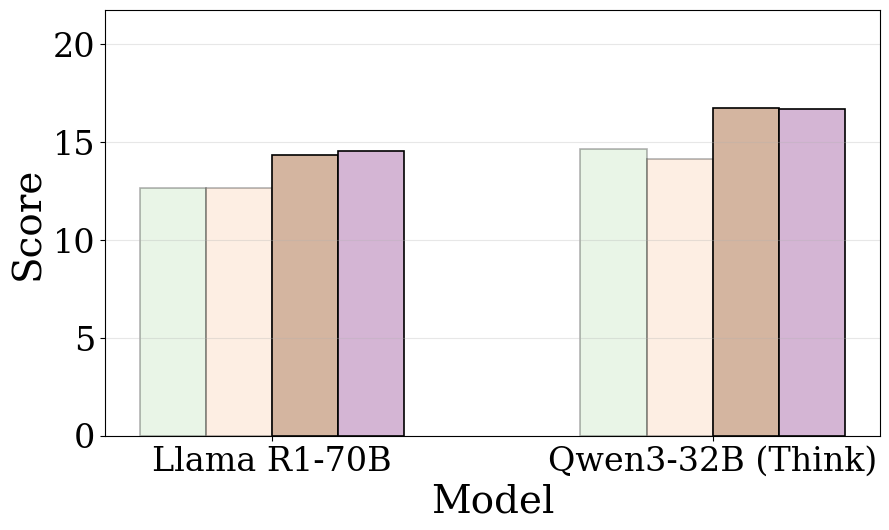

BETTER Reasoning comparison data saved to: /home/mzubillaga/DocIE/irudiak/better_reasoning_comparison_data.csv


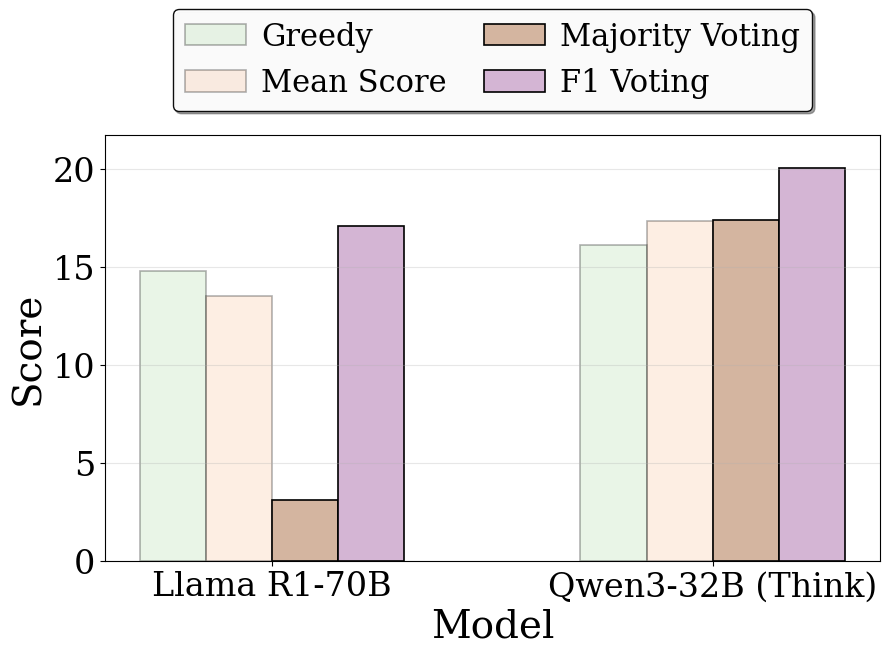

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "Nimbus Roman No9 L", "DejaVu Serif"],
    "font.size": 20,
    "axes.titlesize": 25,
    "axes.labelsize": 24,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "figure.titlesize": 25
})

models_of_interest = ['LlamaR1-70B', 'Qwen3-32B_think']

# Métricas a mostrar
metrics = ['greedy', 'random_mean_score', 'voter_majority', 'voter_f1']
metric_labels = ['Greedy', 'Mean Score', 'Majority Voting', 'F1 Voting']

# Colores para cada métrica
metric_colors = {
    'greedy': '#B8E0B2',
    'random_mean_score': '#F9C8A4',
    'voter_f1': '#D4B5D4',
    'voter_majority': '#D4B5A0',
    'max_score': '#B4D4D4'
}

metric_alphas = {
    'greedy': 0.3,
    'random_mean_score': 0.3,
    'voter_f1': 1.0,
    'voter_majority': 1.0,
    'max_score': 0.2
}

model_labels_simple = {
    'LlamaR1-70B': 'Llama R1-70B',
    'Qwen3-32B_think': 'Qwen3-32B (Think)'
}

# --- PLOT 1: MUC (promedio de todos los idiomas) ---
muc_languages = ['ar', 'en', 'fa', 'ko', 'ru', 'zh']
df2 = pd.read_csv('/home/mzubillaga/DocIE/results/analysis_combined.csv')

df_muc = df2[(df2['Dataset/Language'].isin(muc_languages)) & (df2['modelname'].isin(models_of_interest))]

# Calcular promedios por modelo
muc_averages = df_muc.groupby('modelname')[metrics].mean()

# Save MUC averages data to CSV
muc_averages_data = []
for model in models_of_interest:
    row = {'model': model, 'model_label': model_labels_simple[model]}
    for metric, label in zip(metrics, metric_labels):
        row[metric] = muc_averages.loc[model, metric]
    muc_averages_data.append(row)
muc_averages_df = pd.DataFrame(muc_averages_data)
muc_averages_df.to_csv('/home/mzubillaga/DocIE/irudiak/muc_reasoning_comparison_data.csv', index=False)
print(f"MUC Reasoning comparison data saved to: /home/mzubillaga/DocIE/irudiak/muc_reasoning_comparison_data.csv")

fig3, ax3 = plt.subplots(figsize=(10, 6))
x = np.arange(len(models_of_interest))
width = 0.15
n_metrics = len(metrics)

for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
    values = [muc_averages.loc[model, metric] for model in models_of_interest]
    offset = (i - n_metrics / 2 + 0.5) * width
    bars = ax3.bar(x + offset, values, width,
                   color=metric_colors[metric], edgecolor='black', linewidth=1.2,
                   alpha=metric_alphas[metric])

ax3.set_xlabel('Model', fontsize=28)
ax3.set_ylabel('Score', fontsize=28)
#ax3.set_title('MUC - Average of all Language', fontsize=28)
ax3.set_xticks(x)
ax3.set_xticklabels([model_labels_simple[m] for m in models_of_interest], fontsize=24)
ax3.tick_params(axis='both', which='major', labelsize=24)
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim(0, muc_averages.max().max() * 1.3)

# Sin leyenda en el primer gráfico
# Ajustar espacio igual que el segundo gráfico para mantener el mismo tamaño
fig3.subplots_adjust(top=0.82)

plt.savefig('/home/mzubillaga/DocIE/irudiak/muc_reasoning_comparison.pdf', bbox_inches='tight', dpi=300)
plt.savefig('/home/mzubillaga/DocIE/irudiak/muc_reasoning_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# --- PLOT 2: BETTER ---
df_better = df2[(df2['Dataset/Language'] == 'BETTER') & (df2['modelname'].isin(models_of_interest))]

# Save BETTER data to CSV
better_data = []
for model in models_of_interest:
    row = {'model': model, 'model_label': model_labels_simple[model]}
    for metric, label in zip(metrics, metric_labels):
        row[metric] = df_better[df_better['modelname'] == model][metric].values[0]
    better_data.append(row)
better_data_df = pd.DataFrame(better_data)
better_data_df.to_csv('/home/mzubillaga/DocIE/irudiak/better_reasoning_comparison_data.csv', index=False)
print(f"BETTER Reasoning comparison data saved to: /home/mzubillaga/DocIE/irudiak/better_reasoning_comparison_data.csv")

fig4, ax4 = plt.subplots(figsize=(10, 6))

for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
    values = [df_better[df_better['modelname'] == model][metric].values[0] for model in models_of_interest]
    offset = (i - n_metrics / 2 + 0.5) * width
    bars = ax4.bar(x + offset, values, width,
                   color=metric_colors[metric], edgecolor='black', linewidth=1.2,
                   alpha=metric_alphas[metric], label=label)

ax4.set_xlabel('Model', fontsize=28)
ax4.set_ylabel('Score', fontsize=28)
#ax4.set_title('BETTER Dataset', fontsize=28)
ax4.set_xticks(x)
ax4.set_xticklabels([model_labels_simple[m] for m in models_of_interest], fontsize=24)
ax4.tick_params(axis='both', which='major', labelsize=24)
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim(0, muc_averages.max().max() * 1.3)

# Leyenda fuera del gráfico, centrada arriba
ax4.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), 
          fontsize=22, ncol=2, frameon=True, framealpha=0.95,
          edgecolor='black', fancybox=True, shadow=True,
          columnspacing=1.2, handletextpad=0.5)

# Ajustar espacio para la leyenda
fig4.subplots_adjust(top=0.82)

plt.savefig('/home/mzubillaga/DocIE/irudiak/better_reasoning_comparison.pdf', bbox_inches='tight', dpi=300)
plt.savefig('/home/mzubillaga/DocIE/irudiak/better_reasoning_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# Transferibility

Transferability plot data saved to: /home/mzubillaga/DocIE/irudiak/reward_voter_f1_stacked_comparison_data.csv


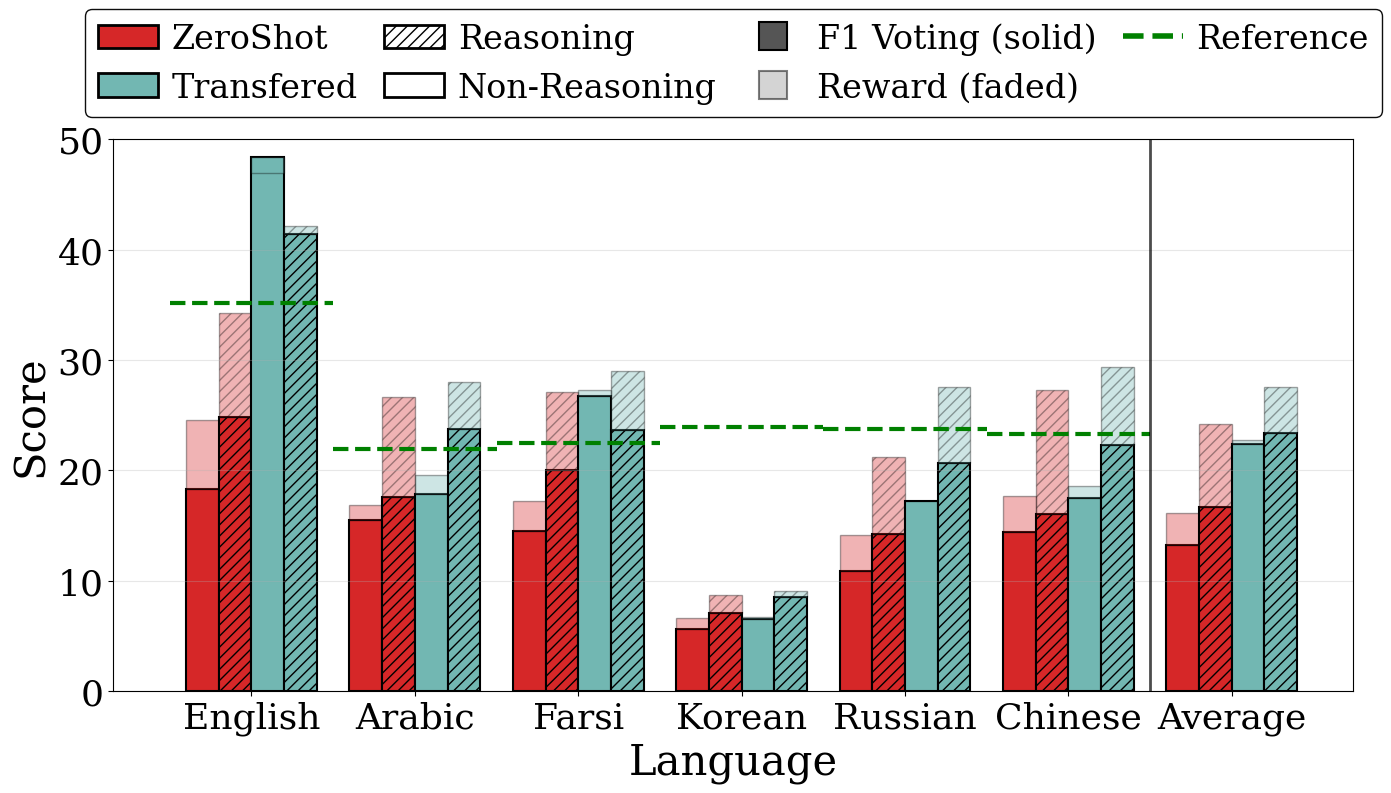

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch, FancyBboxPatch
from matplotlib.lines import Line2D

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "Nimbus Roman No9 L", "DejaVu Serif"],
    "font.size": 20,
    "axes.titlesize": 25,
    "axes.labelsize": 24,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "figure.titlesize": 25
})

# Cargar datos
df_muc = pd.read_csv('/home/mzubillaga/DocIE/results/MUC/zeroshot/test/multilingual_analysis.csv')

# Filtrar idiomas (excluir inglés)
languages = ["en" ,'ar', 'fa', 'ko', 'ru', 'zh']
languages_map = {"en": "English", "ar": "Arabic", "fa": "Farsi", "ko": "Korean", "ru": "Russian", "zh": "Chinese"}
languages_mapped = [languages_map[lang] for lang in languages]

# Modelos de interés
models_of_interest = ['MUCQWEN_nothink', 'MUCQWEN_think', 'Qwen3-32B_nothink', 'Qwen3-32B_think']

# Filtrar datos
df_filtered = df_muc[(df_muc['language'].isin(languages)) & (df_muc['modelname'].isin(models_of_interest))]
model_average_vf1 = df_filtered.groupby('modelname')['voter_f1'].mean().to_dict()
model_average_reward = df_filtered.groupby('modelname')['reward'].mean().to_dict()


# Definir colores y patrones
colors = {
    'MUCQWEN_nothink': "#72B7B2",
    'MUCQWEN_think': '#72B7B2',
    'Qwen3-32B_nothink': '#d62728',
    'Qwen3-32B_think': '#d62728'
}

hatches = {
    'MUCQWEN_nothink': '',
    'MUCQWEN_think': '///',
    'Qwen3-32B_nothink': '',
    'Qwen3-32B_think': '///'
}

model_labels = {
    'MUCQWEN_nothink': 'MUCQWEN (NR)',
    'MUCQWEN_think': 'MUCQWEN (R)',
    'Qwen3-32B_nothink': 'Qwen3-32B (NR)',
    'Qwen3-32B_think': 'Qwen3-32B (R)'
}

sota_per_language = {
    "en": 35.2,
    'ar': 21.98,
    'fa':  22.44,
    'ko': 23.91,
    'ru': 23.77,
    'zh': 23.26
}

model_order = ['Qwen3-32B_nothink', 'Qwen3-32B_think', 'MUCQWEN_nothink', 'MUCQWEN_think']

x = np.arange(len(languages) + 1)  # +1 para la columna de promedio
width = 0.2

# Leyenda simplificada y clara - organizada por categorías
legend_elements = [
    # Tipo de modelo (color)
    Patch(facecolor='#d62728', edgecolor='black', linewidth=2, label='ZeroShot'),
    Patch(facecolor='#72B7B2', edgecolor='black', linewidth=2, label='Transfered'),
    # Reasoning (hatch) - usar color neutro para que se vea el patrón
    Patch(facecolor='white', edgecolor='black', hatch='///', linewidth=2, label='Reasoning'),
    Patch(facecolor='white', edgecolor='black', linewidth=2, label='Non-Reasoning'),
    # Métricas apiladas - barra compuesta para mostrar claramente la diferencia
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#555555', 
           markersize=20, markeredgecolor='black', markeredgewidth=1.5, label='F1 Voting (solid)'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#AAAAAA', 
           markersize=20, markeredgecolor='black', markeredgewidth=1.5, alpha=0.5, label='Reward (faded)'),
    # Reference
    Line2D([0], [0], color='green', linestyle='--', linewidth=4, label='Reference')
]

# Collect data for CSV
transferability_data = []

# Plot único con barras apiladas
fig, ax = plt.subplots(figsize=(16, 8))

for i, model in enumerate(model_order):
    model_data = df_filtered[df_filtered['modelname'] == model]
    
    # Obtener scores de voter_f1 (base) y reward para cada idioma
    voter_f1_scores = [model_data[model_data['language'] == lang]['voter_f1'].values[0]
                       if len(model_data[model_data['language'] == lang]) > 0 else 0
                       for lang in languages]
    reward_scores = [model_data[model_data['language'] == lang]['reward'].values[0]
                     if len(model_data[model_data['language'] == lang]) > 0 else 0
                     for lang in languages]
    
    # Agregar los promedios al final
    voter_f1_scores.append(model_average_vf1[model])
    reward_scores.append(model_average_reward[model])
    
    # Calcular la diferencia (reward - voter_f1) para apilar
    diff_scores = [r - v for r, v in zip(reward_scores, voter_f1_scores)]
    
    # Collect data for CSV
    for j, lang in enumerate(languages):
        transferability_data.append({
            'model': model,
            'model_label': model_labels[model],
            'language': lang,
            'language_label': languages_mapped[j],
            'voter_f1': voter_f1_scores[j],
            'reward': reward_scores[j],
            'reward_minus_voter_f1': diff_scores[j],
            'sota_reference': sota_per_language.get(lang, None)
        })
    # Add average row
    transferability_data.append({
        'model': model,
        'model_label': model_labels[model],
        'language': 'Average',
        'language_label': 'Average',
        'voter_f1': model_average_vf1[model],
        'reward': model_average_reward[model],
        'reward_minus_voter_f1': diff_scores[-1],
        'sota_reference': None
    })
    
    # Barras de Voter F1 (base, color sólido)
    ax.bar(x + i * width, voter_f1_scores, width,
           color=colors[model], edgecolor='black', linewidth=1.5,
           hatch=hatches[model], alpha=1.0)
    
    # Barras de diferencia apiladas encima (más claras)
    ax.bar(x + i * width, diff_scores, width, bottom=voter_f1_scores,
           color=colors[model], edgecolor='black', linewidth=1.0,
           hatch=hatches[model], alpha=0.35)

# Save transferability data to CSV
transferability_df = pd.DataFrame(transferability_data)
transferability_df.to_csv('/home/mzubillaga/DocIE/irudiak/reward_voter_f1_stacked_comparison_data.csv', index=False)
print(f"Transferability plot data saved to: /home/mzubillaga/DocIE/irudiak/reward_voter_f1_stacked_comparison_data.csv")

# Añadir líneas horizontales para SOTA por idioma
for idx, lang in enumerate(languages):
    sota_value = sota_per_language[lang]
    # Línea horizontal que cubre el ancho de las barras de ese idioma
    sota_x_start = idx - width
    sota_x_end = idx + width * (len(model_order) - 1) + width
    ax.hlines(y=sota_value, xmin=sota_x_start, xmax=sota_x_end,
              colors='green', linestyles='--', linewidth=3)
# Línea vertical separadora antes de la columna de promedio
separator_x = len(languages) -0.2
ax.axvline(x=separator_x, color='black', linestyle='-', linewidth=2, alpha=0.7)

ax.set_xlabel('Language', fontsize=30)
ax.set_ylabel('Score', fontsize=30)
ax.set_ylim(0.0,  50.0)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(languages_mapped + ['Average'], fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=26)
ax.grid(axis='y', alpha=0.3)

# Leyenda en 2 filas, más compacta y clara
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 1.01),
          fontsize=24, ncol=4, columnspacing=0.8, handletextpad=0.4, framealpha=0.95,
          edgecolor='black', fancybox=True, handlelength=1.8)

# Dejar espacio para la leyenda
fig.subplots_adjust(top=0.80)


plt.savefig('/home/mzubillaga/DocIE/irudiak/reward_voter_f1_stacked_comparison.pdf', bbox_inches='tight', dpi=300)
plt.savefig('/home/mzubillaga/DocIE/irudiak/reward_voter_f1_stacked_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

Transferability plot data saved to: /home/mzubillaga/DocIE/irudiak/reward_voter_f1_stacked_comparison_data.csv


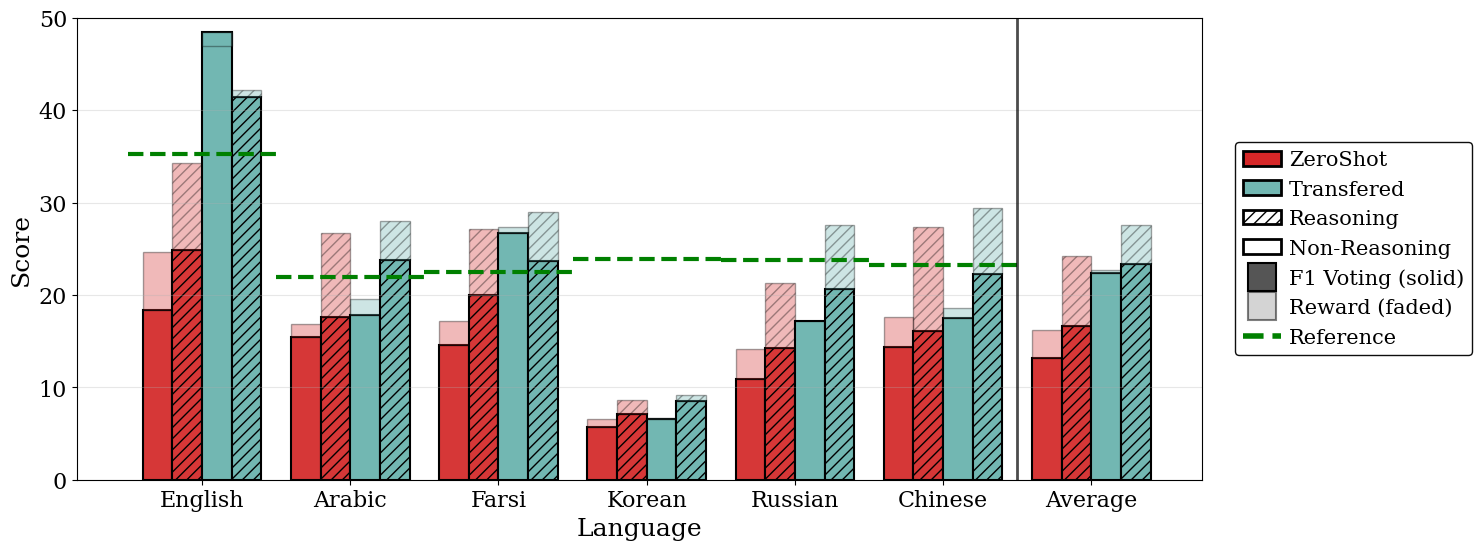

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch, FancyBboxPatch
from matplotlib.lines import Line2D

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "Nimbus Roman No9 L", "DejaVu Serif"],
    "font.size": 20,
    "axes.titlesize": 25,
    "axes.labelsize": 24,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "figure.titlesize": 25
})

# Cargar datos
df_muc = pd.read_csv('/home/mzubillaga/DocIE/results/MUC/zeroshot/test/multilingual_analysis.csv')

# Filtrar idiomas (excluir inglés)
languages = ["en" ,'ar', 'fa', 'ko', 'ru', 'zh']
languages_map = {"en": "English", "ar": "Arabic", "fa": "Farsi", "ko": "Korean", "ru": "Russian", "zh": "Chinese"}
languages_mapped = [languages_map[lang] for lang in languages]

# Modelos de interés
models_of_interest = ['MUCQWEN_nothink', 'MUCQWEN_think', 'Qwen3-32B_nothink', 'Qwen3-32B_think']

# Filtrar datos
df_filtered = df_muc[(df_muc['language'].isin(languages)) & (df_muc['modelname'].isin(models_of_interest))]
model_average_vf1 = df_filtered.groupby('modelname')['voter_f1'].mean().to_dict()
model_average_reward = df_filtered.groupby('modelname')['reward'].mean().to_dict()


# Definir colores y patrones
colors = {
    'MUCQWEN_nothink': "#72B7B2E6",
    'MUCQWEN_think': "#72B7B2E6",
    'Qwen3-32B_nothink': "#d63737dd",
    'Qwen3-32B_think': "#d63737dd"
}

hatches = {
    'MUCQWEN_nothink': '',
    'MUCQWEN_think': '///',
    'Qwen3-32B_nothink': '',
    'Qwen3-32B_think': '///'
}

model_labels = {
    'MUCQWEN_nothink': 'MUCQWEN (NR)',
    'MUCQWEN_think': 'MUCQWEN (R)',
    'Qwen3-32B_nothink': 'Qwen3-32B (NR)',
    'Qwen3-32B_think': 'Qwen3-32B (R)'
}

sota_per_language = {
    "en": 35.2,
    'ar': 21.98,
    'fa':  22.44,
    'ko': 23.91,
    'ru': 23.77,
    'zh': 23.26
}

model_order = ['Qwen3-32B_nothink', 'Qwen3-32B_think', 'MUCQWEN_nothink', 'MUCQWEN_think']

x = np.arange(len(languages) + 1)  # +1 para la columna de promedio
width = 0.2

# Leyenda simplificada y clara - organizada por categorías
legend_elements = [
    # Tipo de modelo (color)
    Patch(facecolor='#d62728', edgecolor='black', linewidth=2, label='ZeroShot'),
    Patch(facecolor='#72B7B2', edgecolor='black', linewidth=2, label='Transfered'),
    # Reasoning (hatch) - usar color neutro para que se vea el patrón
    Patch(facecolor='white', edgecolor='black', hatch='///', linewidth=2, label='Reasoning'),
    Patch(facecolor='white', edgecolor='black', linewidth=2, label='Non-Reasoning'),
    # Métricas apiladas - barra compuesta para mostrar claramente la diferencia
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#555555', 
           markersize=20, markeredgecolor='black', markeredgewidth=1.5, label='F1 Voting (solid)'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#AAAAAA', 
           markersize=20, markeredgecolor='black', markeredgewidth=1.5, alpha=0.5, label='Reward (faded)'),
    # Reference
    Line2D([0], [0], color='green', linestyle='--', linewidth=4, label='Reference')
]

# Collect data for CSV
transferability_data = []

# Plot único con barras apiladas
fig, ax = plt.subplots(figsize=(18, 6))  # Más ancho y menos alto

for i, model in enumerate(model_order):
    model_data = df_filtered[df_filtered['modelname'] == model]
    
    # Obtener scores de voter_f1 (base) y reward para cada idioma
    voter_f1_scores = [model_data[model_data['language'] == lang]['voter_f1'].values[0]
                       if len(model_data[model_data['language'] == lang]) > 0 else 0
                       for lang in languages]
    reward_scores = [model_data[model_data['language'] == lang]['reward'].values[0]
                     if len(model_data[model_data['language'] == lang]) > 0 else 0
                     for lang in languages]
    
    # Agregar los promedios al final
    voter_f1_scores.append(model_average_vf1[model])
    reward_scores.append(model_average_reward[model])
    
    # Calcular la diferencia (reward - voter_f1) para apilar
    diff_scores = [r - v for r, v in zip(reward_scores, voter_f1_scores)]
    
    # Collect data for CSV
    for j, lang in enumerate(languages):
        transferability_data.append({
            'model': model,
            'model_label': model_labels[model],
            'language': lang,
            'language_label': languages_mapped[j],
            'voter_f1': voter_f1_scores[j],
            'reward': reward_scores[j],
            'reward_minus_voter_f1': diff_scores[j],
            'sota_reference': sota_per_language.get(lang, None)
        })
    # Add average row
    transferability_data.append({
        'model': model,
        'model_label': model_labels[model],
        'language': 'Average',
        'language_label': 'Average',
        'voter_f1': model_average_vf1[model],
        'reward': model_average_reward[model],
        'reward_minus_voter_f1': diff_scores[-1],
        'sota_reference': None
    })
    
    # Barras de Voter F1 (base, color sólido)
    ax.bar(x + i * width, voter_f1_scores, width,
           color=colors[model], edgecolor='black', linewidth=1.5,
           hatch=hatches[model], alpha=1.0)
    
    # Barras de diferencia apiladas encima (más claras)
    ax.bar(x + i * width, diff_scores, width, bottom=voter_f1_scores,
           color=colors[model], edgecolor='black', linewidth=1.0,
           hatch=hatches[model], alpha=0.35)

# Save transferability data to CSV
transferability_df = pd.DataFrame(transferability_data)
transferability_df.to_csv('/home/mzubillaga/DocIE/irudiak/reward_voter_f1_stacked_comparison_data.csv', index=False)
print(f"Transferability plot data saved to: /home/mzubillaga/DocIE/irudiak/reward_voter_f1_stacked_comparison_data.csv")

# Añadir líneas horizontales para SOTA por idioma
for idx, lang in enumerate(languages):
    sota_value = sota_per_language[lang]
    # Línea horizontal que cubre el ancho de las barras de ese idioma
    sota_x_start = idx - width
    sota_x_end = idx + width * (len(model_order) - 1) + width
    ax.hlines(y=sota_value, xmin=sota_x_start, xmax=sota_x_end,
              colors='green', linestyles='--', linewidth=3)
# Línea vertical separadora antes de la columna de promedio
separator_x = len(languages) -0.2
ax.axvline(x=separator_x, color='black', linestyle='-', linewidth=2, alpha=0.7)

# Etiquetas y fuente más pequeña
ax.set_xlabel('Language', fontsize=18)
ax.set_ylabel('Score', fontsize=18)
ax.set_ylim(0.0,  50.0)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(languages_mapped + ['Average'], fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(axis='y', alpha=0.3)

# Leyenda a la derecha del gráfico
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5),
          fontsize=15, ncol=1, columnspacing=0.8, handletextpad=0.4, framealpha=0.95,
          edgecolor='black', fancybox=True, handlelength=1.8)

# Dejar espacio para la leyenda a la derecha
fig.subplots_adjust(right=0.75)


plt.savefig('/home/mzubillaga/DocIE/irudiak/reward_voter_f1_stacked_comparison2.pdf', bbox_inches='tight', dpi=300)
plt.savefig('/home/mzubillaga/DocIE/irudiak/reward_voter_f1_stacked_comparison2.png', bbox_inches='tight', dpi=300)
plt.show()

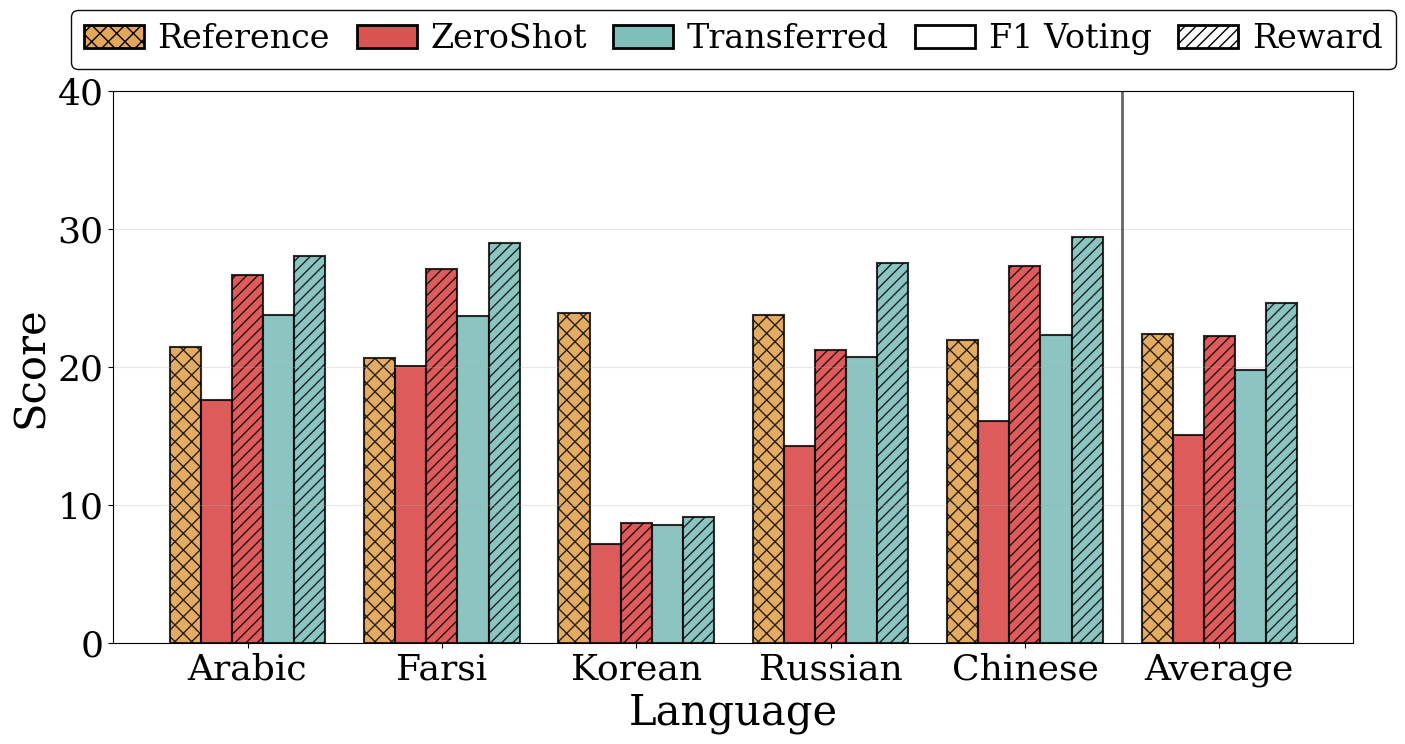

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch, FancyBboxPatch
from matplotlib.lines import Line2D


# Definir colores y patrones
colors = {
    'MUCQWEN_nothink': "#72B7B2E6",
    'MUCQWEN_think': "#72B7B2E6",
    'Qwen3-32B_nothink': "#d63737dd",
    'Qwen3-32B_think': "#d63737dd",
    "Reference":  "#df9a41dd",

}

hatches = {
    'MUCQWEN_nothink': '',
    'MUCQWEN_think': '///',
    'Qwen3-32B_nothink': '',
    'Qwen3-32B_think': '///',
    "Reference": 'xx'
}

sota_per_language = {
    'ar': 21.46,
    'fa':  20.66,
    'ko': 23.91,
    'ru': 23.77,
    'zh': 21.93
}

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "Nimbus Roman No9 L", "DejaVu Serif"],
    "font.size": 20,
    "axes.titlesize": 25,
    "axes.labelsize": 24,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "figure.titlesize": 25
})

# Cargar datos
df_muc = pd.read_csv('/home/mzubillaga/DocIE/results/MUC/zeroshot/test/multilingual_analysis.csv')

# Filtrar idiomas (excluir inglés y referencias)
languages = ['ar', 'fa', 'ko', 'ru', 'zh']
languages_map = {"ar": "Arabic", "fa": "Farsi", "ko": "Korean", "ru": "Russian", "zh": "Chinese"}
languages_mapped = [languages_map[lang] for lang in languages]

# Filtrar datos
models_of_interest = ['MUCQWEN_nothink', 'MUCQWEN_think', 'Qwen3-32B_nothink', 'Qwen3-32B_think']
df_filtered = df_muc[(df_muc['language'].isin(languages)) & (df_muc['modelname'].isin(models_of_interest))]
model_average_vf1 = df_filtered.groupby('modelname')['voter_f1'].mean().to_dict()
model_average_reward = df_filtered.groupby('modelname')['reward'].mean().to_dict()

model_labels = {
    'MUCQWEN_nothink': 'MUCQWEN (NR)',
    'MUCQWEN_think': 'MUCQWEN (R)',
    'Qwen3-32B_nothink': 'Qwen3-32B (NR)',
    'Qwen3-32B_think': 'Qwen3-32B (R)'
}

model_order = ['Qwen3-32B_think', 'MUCQWEN_think']

x = np.arange(len(languages) + 1)  # +1 para la columna de promedio
width = 0.16  # Ajustado para 5 barras (0.16 * 5 = 0.8 ancho total del grupo)

# Leyenda simplificada
legend_elements = [
    # Tipo de modelo (color)
    Patch(facecolor="#df9a41dd", edgecolor='black', linewidth=2, label='Reference', hatch=hatches["Reference"]),
    Patch(facecolor="#d63737dd", edgecolor='black', linewidth=2, label='ZeroShot'),
    Patch(facecolor="#72B7B2E6", edgecolor='black', linewidth=2, label='Transferred'),
    # Metrica (Estilo)
    Patch(facecolor='white', edgecolor='black', linewidth=2, label='F1 Voting'),
    # Cambio etiqueta: de Reward Gain a Reward (ya no es apilada)
    Patch(facecolor='white', edgecolor='black', hatch='///', linewidth=2, label='Reward'),
]

# Collect data for CSV
transferability_data = []

# Plot único
fig, ax = plt.subplots(figsize=(16, 8))

# Añadir barra de Reference primero (primera barra, posición 0)
reference_scores = [sota_per_language[lang] for lang in languages]
# Calcular promedio de reference para la columna Average
reference_avg = np.mean(reference_scores)
reference_scores.append(reference_avg)

# Add Reference data to CSV list
for j, lang in enumerate(languages):
    transferability_data.append({
        'model': 'Reference',
        'model_label': 'Reference',
        'language': lang,
        'language_label': languages_mapped[j],
        'voter_f1': reference_scores[j],
        'reward': reference_scores[j],
        'reward_minus_voter_f1': 0
    })
# Average for Reference
transferability_data.append({
    'model': 'Reference',
    'model_label': 'Reference',
    'language': 'Average',
    'language_label': 'Average',
    'voter_f1': reference_avg,
    'reward': reference_avg,
    'reward_minus_voter_f1': 0
})

pos_reference = x  # Posición de la primera barra
ax.bar(pos_reference, reference_scores, width,
       color=colors["Reference"], edgecolor='black', linewidth=1.5, alpha=0.82, hatch=hatches["Reference"])

for i, model in enumerate(model_order):
    model_data = df_filtered[df_filtered['modelname'] == model]
    
    # Obtener scores de voter_f1 (base) y reward para cada idioma
    voter_f1_scores = [model_data[model_data['language'] == lang]['voter_f1'].values[0]
                       if len(model_data[model_data['language'] == lang]) > 0 else 0
                       for lang in languages]
    reward_scores = [model_data[model_data['language'] == lang]['reward'].values[0]
                     if len(model_data[model_data['language'] == lang]) > 0 else 0
                     for lang in languages]
    
    # Agregar los promedios al final
    voter_f1_scores.append(model_average_vf1[model])
    reward_scores.append(model_average_reward[model])
    
    # Calcular la diferencia (opcional, solo para el CSV si se desea mantener registro)
    diff_scores = [r - v for r, v in zip(reward_scores, voter_f1_scores)]
    
    # Collect data for CSV
    for j, lang in enumerate(languages):
        transferability_data.append({
            'model': model,
            'model_label': model_labels[model],
            'language': lang,
            'language_label': languages_mapped[j],
            'voter_f1': voter_f1_scores[j],
            'reward': reward_scores[j],
            'reward_minus_voter_f1': diff_scores[j]
        })
    # Add average row
    transferability_data.append({
        'model': model,
        'model_label': model_labels[model],
        'language': 'Average',
        'language_label': 'Average',
        'voter_f1': model_average_vf1[model],
        'reward': model_average_reward[model],
        'reward_minus_voter_f1': diff_scores[-1]
    })
    
    # Calcular posiciones para barras independientes (desplazadas 1 posición por la barra Reference)
    # i=0 (Qwen): barras en 1 y 2
    # i=1 (MUC): barras en 3 y 4
    pos_f1 = x + (i * 2 + 1) * width
    pos_reward = x + (i * 2 + 2) * width
    
    # Barras de Voter F1 (sin hatch)
    ax.bar(pos_f1, voter_f1_scores, width,
           color=colors[model], edgecolor='black', linewidth=1.5, alpha=0.82)
    
    # Barras de Reward (con hatch, separadas)
    ax.bar(pos_reward, reward_scores, width,
           color=colors[model], edgecolor='black', linewidth=1.5,
           hatch=hatches[model], alpha=0.82)

separator_x = len(languages) - 0.5 + 2 * width
ax.axvline(x=separator_x, color='black', linestyle='-', linewidth=2, alpha=0.6)

ax.set_xlabel('Language', fontsize=30)
ax.set_ylabel('Score', fontsize=30)
ax.set_ylim(0.0, 40.0)

# Centrar ticks: Tenemos 5 barras (0,1,2,3,4). El centro visual es 2 * width
ax.set_xticks(x + width * 2)
ax.set_xticklabels(languages_mapped + ['Average'], fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=26)
ax.grid(axis='y', alpha=0.3)

# Leyenda
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 1.01),
          fontsize=24, ncol=5, columnspacing=0.8, handletextpad=0.4, framealpha=0.95,
          edgecolor='black', fancybox=True, handlelength=1.8)

# Dejar espacio para la leyenda
fig.subplots_adjust(top=0.80)

# Save plot data to CSV
transferability_df = pd.DataFrame(transferability_data)
transferability_df.to_csv('/home/mzubillaga/DocIE/irudiak/reward_voter_f1_reasoning_data.csv', index=False)
print(f"Plot data saved to: /home/mzubillaga/DocIE/irudiak/reward_voter_f1_reasoning_data.csv")

plt.savefig('/home/mzubillaga/DocIE/irudiak/reward_voter_f1_reasoning.pdf', bbox_inches='tight', dpi=300)
plt.savefig('/home/mzubillaga/DocIE/irudiak/reward_voter_f1_reasoning.png', bbox_inches='tight', dpi=300)
plt.show()